## Pornography & Religion in USA - Cluster analysis

My mission is to analyze a data set of social attitudes by turning it into vectors, then visualizing the result.

I am going to be working with data from the General Social Survey, which asks Americans thousands of questions ever year, over decades. I have combined up to 10 variables (listed below).

I used their [data explorer](https://gssdataexplorer.norc.org/) to see what's available -variables containing the Religion and variables related to pornography-, and downloaded the Excel file with the data. 

I am interested in the beliefs / tolerance of the people related to pornography in accordance to their religion.

Description: Correlation

The variables I will use:



In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression,LogisticRegression
%matplotlib inline

In [2]:
df2 = pd.read_csv('GSS7_8.csv', header=0, delimiter = ';')
len(df2)

15956

In [3]:
df2.shape

(15956, 5)

In [4]:
pd.set_option('display.max_rows', 20000)

In [5]:
df2.head()

Religion in which raised Feelings about pornography laws  \
0                 Catholic                  Illegal to all   
1                 Catholic                Illegal under 18   
2                 Catholic                  Illegal to all   
3               Protestant                  Not applicable   
4                 Catholic                  Not applicable   

  Seen x-rated movie in last year R had sex for pay last year  \
0                              No              Not applicable   
1                             Yes                   No answer   
2                              No              Not applicable   
3                  Not applicable                Not selected   
4                  Not applicable                Not selected   

  Ever have sex paid for or being paid since 18  
0                                Not applicable  
1                                            No  
2                                Not applicable  
3                                            No  
4                                            No

In [6]:
pd.set_option('display.max_rows', 20000)

In [7]:
#df2 = df2.replace({'No':2, 'Yes':1,'No answer':9, "Don't know":8, 'Not applicable':0, 'Legal':3, 'Illegal under 18':6, 'Illegal to all':5, 'Had sex for pay':7, 'Not selected':4, 'Protestant':22, 'Catholic':21, 'Jewish':20, 'Other':5, 'Christian':11, 'Moslem/islam':14, 'Orthodox-christian':10, 'Buddhism':7, 'Hinduism':16, 'Inter-nondenominational':13, 'Native american':12, 'Other eastern':15, 'None':19})

In [8]:
#df2 = df2.replace({np.nan:0.0})

In [9]:
df2.dtypes

Religion in which raised                         object
Feelings about pornography laws                  object
Seen x-rated movie in last year                  object
R had sex for pay last year                      object
Ever have sex paid for or being paid since 18    object
dtype: object

In [10]:
df2['Religion in which raised'].value_counts()

Protestant                 7580
Catholic                   4690
Not applicable             1518
None                       1183
Christian                   283
Jewish                      252
Moslem/islam                 89
Hinduism                     76
Buddhism                     66
Other                        63
Orthodox-christian           60
No answer                    45
Don't know                   33
Native american               9
Inter-nondenominational       5
Other eastern                 4
Name: Religion in which raised, dtype: int64

In [11]:
df2['Feelings about pornography laws'].value_counts()

Not applicable      6244
Illegal under 18    5958
Illegal to all      3300
Legal                370
Don't know            66
No answer             18
Name: Feelings about pornography laws, dtype: int64

In [12]:
df2['Seen x-rated movie in last year'].value_counts()

No                7272
Not applicable    6244
Yes               2395
Don't know          25
No answer           20
Name: Seen x-rated movie in last year, dtype: int64

In [13]:
df2['R had sex for pay last year'].value_counts()

Not applicable     13823
Not selected        1879
No answer            178
Had sex for pay       76
Name: R had sex for pay last year, dtype: int64

In [14]:
df2['Ever have sex paid for or being paid since 18'].value_counts()

No                10830
Not applicable     4060
Yes                 859
No answer           189
Don't know           18
Name: Ever have sex paid for or being paid since 18, dtype: int64

In [15]:
df2['Religion in which raised'].value_counts()

Protestant                 7580
Catholic                   4690
Not applicable             1518
None                       1183
Christian                   283
Jewish                      252
Moslem/islam                 89
Hinduism                     76
Buddhism                     66
Other                        63
Orthodox-christian           60
No answer                    45
Don't know                   33
Native american               9
Inter-nondenominational       5
Other eastern                 4
Name: Religion in which raised, dtype: int64

In [16]:
df2['Feelings about pornography laws'].value_counts()

Not applicable      6244
Illegal under 18    5958
Illegal to all      3300
Legal                370
Don't know            66
No answer             18
Name: Feelings about pornography laws, dtype: int64

In [17]:
df2['Seen x-rated movie in last year'].value_counts()

No                7272
Not applicable    6244
Yes               2395
Don't know          25
No answer           20
Name: Seen x-rated movie in last year, dtype: int64

In [18]:
df2['R had sex for pay last year'].value_counts()

Not applicable     13823
Not selected        1879
No answer            178
Had sex for pay       76
Name: R had sex for pay last year, dtype: int64

In [19]:
df2['Ever have sex paid for or being paid since 18'].value_counts()

No                10830
Not applicable     4060
Yes                 859
No answer           189
Don't know           18
Name: Ever have sex paid for or being paid since 18, dtype: int64

In [20]:
df2.groupby(['Religion in which raised', 'Feelings about pornography laws']).size()

Religion in which raised  Feelings about pornography laws
Buddhism                  Don't know                            1
                          Illegal to all                       12
                          Illegal under 18                     27
                          Legal                                 1
                          Not applicable                       25
Catholic                  Don't know                           20
                          Illegal to all                     1014
                          Illegal under 18                   1998
                          Legal                               124
                          No answer                             5
                          Not applicable                     1529
Christian                 Don't know                            1
                          Illegal to all                       47
                          Illegal under 18                    134
                  

In [21]:
df2.head()

Religion in which raised Feelings about pornography laws  \
0                 Catholic                  Illegal to all   
1                 Catholic                Illegal under 18   
2                 Catholic                  Illegal to all   
3               Protestant                  Not applicable   
4                 Catholic                  Not applicable   

  Seen x-rated movie in last year R had sex for pay last year  \
0                              No              Not applicable   
1                             Yes                   No answer   
2                              No              Not applicable   
3                  Not applicable                Not selected   
4                  Not applicable                Not selected   

  Ever have sex paid for or being paid since 18  
0                                Not applicable  
1                                            No  
2                                Not applicable  
3                                            No  
4                                            No

In [22]:
df_new = pd.DataFrame(df2.groupby(['Religion in which raised', 'Feelings about pornography laws']).size())

In [23]:
df_new

0
Religion in which raised Feelings about pornography laws      
Buddhism                 Don't know                          1
                         Illegal to all                     12
                         Illegal under 18                   27
                         Legal                               1
                         Not applicable                     25
Catholic                 Don't know                         20
                         Illegal to all                   1014
                         Illegal under 18                 1998
                         Legal                             124
                         No answer                           5
                         Not applicable                   1529
Christian                Don't know                          1
                         Illegal to all                     47
                         Illegal under 18                  134
                         Legal                               7
                         Not applicable                     94
Don't know               Illegal to all                      5
                         Illegal under 18                   17
                         Legal                               2
                         Not applicable                      9
Hinduism                 Don't know                          4
                         Illegal to all                     12
                         Illegal under 18                   32
                         Legal                               2
                         Not applicable                     26
Inter-nondenominational  Illegal to all                      1
                         Illegal under 18                    3
                         Not applicable                      1
Jewish                   Don't know                          2
                         Illegal to all                     27
                         Illegal under 18                  137
                         Legal                              10
                         Not applicable                     76
Moslem/islam             Don't know                          1
                         Illegal to all                     17
                         Illegal under 18                   31
                         Legal                               2
                         Not applicable                     38
Native american          Illegal to all                      4
                         Illegal under 18                    3
                         Not applicable                      2
No answer                Don't know                          1
                         Illegal to all                     12
                         Illegal under 18                   16
                         Legal                               2
                         No answer                           4
                         Not applicable                     10
None                     Don't know                          6
                         Illegal to all                    209
                         Illegal under 18                  550
                         Legal                              34
                         No answer                           2
                         Not applicable                    382
Not applicable           Not applicable                   1518
Orthodox-christian       Illegal to all                      7
                         Illegal under 18                   32
                         Legal                               3
                         No answer                           1
                         Not applicable                     17
Other                    Don't know                          1
                         Illegal to all                     14
                         Illegal under 18                   27
                         Lega

In [24]:
df_new = pd.DataFrame(df2.groupby(['Religion in which raised', 'Feelings about pornography laws']).size().reset_index())

In [25]:
df_new.dtypes

Religion in which raised           object
Feelings about pornography laws    object
0                                   int64
dtype: object

In [26]:
df_new.rename(columns = {0:'count1'}, inplace = True)

In [27]:
df_new.count1 = df_new.count1.astype(float)

In [28]:
df_new['Feelings about pornography laws'].value_counts()

Not applicable      16
Illegal to all      15
Illegal under 18    14
Legal               12
Don't know          11
No answer            5
Name: Feelings about pornography laws, dtype: int64

In [29]:
df_new = df_new[df_new['Feelings about pornography laws']!='Not applicable']

In [30]:
df_new

Religion in which raised Feelings about pornography laws  count1
0                  Buddhism                      Don't know     1.0
1                  Buddhism                  Illegal to all    12.0
2                  Buddhism                Illegal under 18    27.0
3                  Buddhism                           Legal     1.0
5                  Catholic                      Don't know    20.0
6                  Catholic                  Illegal to all  1014.0
7                  Catholic                Illegal under 18  1998.0
8                  Catholic                           Legal   124.0
9                  Catholic                       No answer     5.0
11                Christian                      Don't know     1.0
12                Christian                  Illegal to all    47.0
13                Christian                Illegal under 18   134.0
14                Christian                           Legal     7.0
16               Don't know                  Illegal to all     5.0
17               Don't know                Illegal under 18    17.0
18               Don't know                           Legal     2.0
20                 Hinduism                      Don't know     4.0
21                 Hinduism                  Illegal to all    12.0
22                 Hinduism                Illegal under 18    32.0
23                 Hinduism                           Legal     2.0
25  Inter-nondenominational                  Illegal to all     1.0
26  Inter-nondenominational                Illegal under 18     3.0
28                   Jewish                      Don't know     2.0
29                   Jewish                  Illegal to all    27.0
30                   Jewish                Illegal under 18   137.0
31                   Jewish                           Legal    10.0
33             Moslem/islam                      Don't know     1.0
34             Moslem/islam                  Illegal to all    17.0
35             Moslem/islam                Illegal under 18    31.0
36             Moslem/islam                           Legal     2.0
38          Native american                  Illegal to all     4.0
39          Native american                Illegal under 18     3.0
41                No answer                      Don't know     1.0
42                No answer                  Illegal to all    12.0
43                No answer                Illegal under 18    16.0
44                No answer                           Legal     2.0
45                No answer                       No answer     4.0
47                     None                      Don't know     6.0
48                     None                  Illegal to all   209.0
49                     None                Illegal under 18   550.0
50                     None                           Legal    34.0
51                     None                       No answer     2.0
54       Orthodox-christian                  Illegal to all     7.0
55       Orthodox-christian                Illegal under 18    32.0
56       Orthodox-christian                           Legal     3.0
57       Orthodox-christian                       No answer     1.0
59                    Other                      Don't know     1.0
60                    Other                  Illegal to all    14.0
61                    Other                Illegal under 18    27.0
62                    Other                           Legal     4.0
64            Other eastern                      Don't know     1.0
65            Other eastern                  Illegal to all     2.0
67               Protestant                      Don't know    28.0
68               Protestant                  Illegal to all  1917.0
69               Protestant                Illegal under 18  2951.0
70               Protestant                           Legal   179.0
71               Protestant                       No answer     6.0

In [31]:
df_new = pd.read_csv('df_new.csv')

In [32]:
df_new['Religion in which raised'].value_counts()

Hinduism                   5
Orthodox-christian         5
No answer                  5
Catholic                   5
Buddhism                   5
Inter-nondenominational    5
Jewish                     5
Other eastern              5
Don't know                 5
Other                      5
Protestant                 5
None                       5
Moslem/islam               5
Christian                  5
Native american            5
Name: Religion in which raised, dtype: int64

In [33]:
df_new.shape

(75, 4)

In [34]:
plt.style.use('classic')

In [36]:
data1 = np.reshape(np.array(data),(15,5))

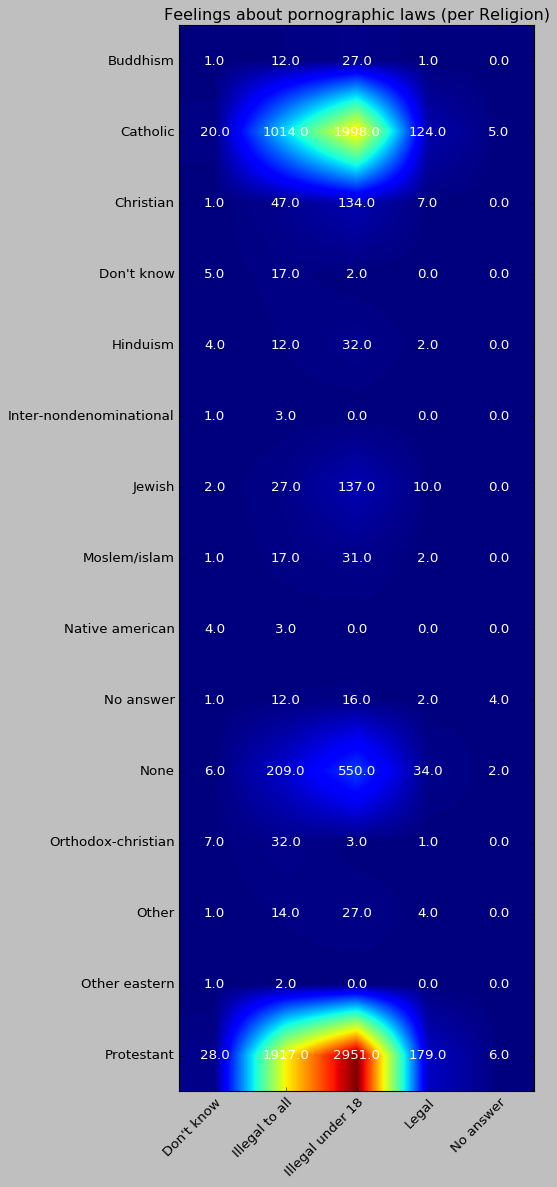

In [37]:
feelings = df_new['Feelings about pornography laws'].unique()
religion= df_new['Religion in which raised'].unique()

data = df_new['count1']


fig,ax = plt.subplots(figsize = (8,15))
im = ax.imshow(data1)


# We want to show all ticks...
ax.set_xticks(np.arange(len(feelings)))
ax.set_yticks(np.arange(len(religion)))
# ... and label them with the respective list entries
ax.set_xticklabels(feelings)
ax.set_yticklabels(religion)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

#Loop over data dimensions and create text annotations.
for i in range(len(religion)):
    for j in range(len(feelings)):
        text = ax.text(j, i, data1[i, j],
                       ha="center", va="center", color="w")
        
ax.set_title("Feelings about pornographic laws (per Religion)")
fig.tight_layout()
plt.show()


In [38]:
from matplotlib import colors
cmap = colors.ListedColormap(['green','red','black','yellow'])

In [39]:
plt.savefig("Religion_heatmap.pdf")

<Figure size 640x480 with 0 Axes>

In [ ]:
# data1 = np.reshape(np.array(data),(15,5))

In [40]:
df_new['Feelings about pornography laws'].unique()

array(["Don't know", 'Illegal to all', 'Illegal under 18', 'Legal',
       'No answer'], dtype=object)

In [52]:
df2 = pd.read_csv('GSS7_8.csv', header=0, delimiter = ';')


In [53]:
df2.groupby(['Religion in which raised', 'Seen x-rated movie in last year']).size()

Religion in which raised  Seen x-rated movie in last year
Buddhism                  No                                   31
                          Not applicable                       25
                          Yes                                  10
Catholic                  Don't know                           10
                          No                                 2379
                          No answer                             4
                          Not applicable                     1529
                          Yes                                 768
Christian                 No                                  118
                          No answer                             1
                          Not applicable                       94
                          Yes                                  70
Don't know                No                                   13
                          Not applicable                        9
                  

In [54]:
df2.groupby(['Religion in which raised', 'R had sex for pay last year']).size()

Religion in which raised  R had sex for pay last year
Buddhism                  No answer                         1
                          Not applicable                   59
                          Not selected                      6
Catholic                  Had sex for pay                  22
                          No answer                        53
                          Not applicable                 4027
                          Not selected                    588
Christian                 No answer                         9
                          Not applicable                  199
                          Not selected                     75
Don't know                No answer                         2
                          Not applicable                   24
                          Not selected                      7
Hinduism                  Had sex for pay                   1
                          No answer                         1
                

In [55]:
df2.groupby(['Religion in which raised', 'Ever have sex paid for or being paid since 18']).size()

Religion in which raised  Ever have sex paid for or being paid since 18
Buddhism                  No                                                 51
                          Not applicable                                      9
                          Yes                                                 6
Catholic                  Don't know                                         12
                          No                                               3447
                          No answer                                          67
                          Not applicable                                    904
                          Yes                                               260
Christian                 No                                                237
                          No answer                                           8
                          Not applicable                                     26
                          Yes                   

In [56]:
plt.style.use('fivethirtyeight')

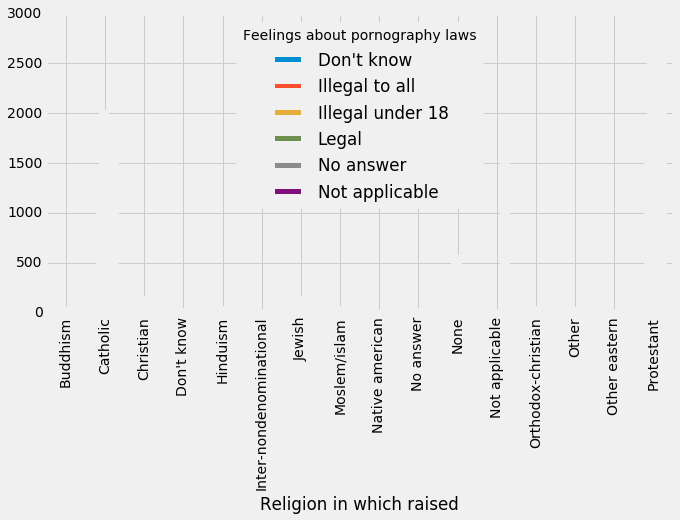

In [57]:
pd.crosstab(df2['Religion in which raised'],df2['Feelings about pornography laws']).plot(kind='bar', figsize=(10, 5), linewidth=7)

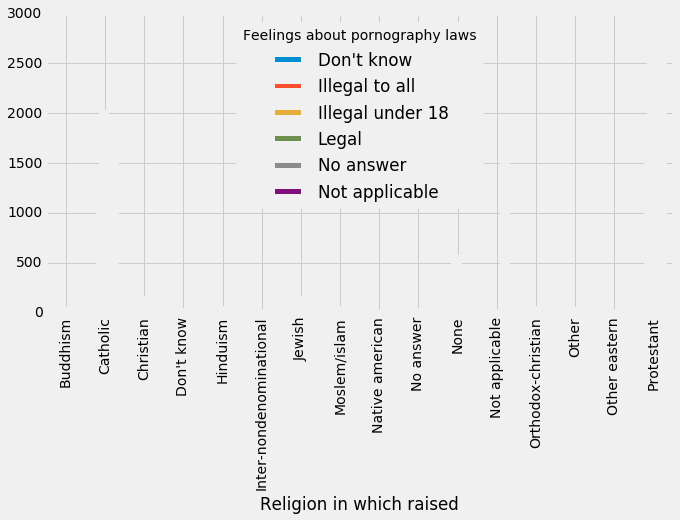

In [58]:
pd.crosstab(df2['Religion in which raised'],df2['Feelings about pornography laws']).plot(kind='bar', figsize=(10, 5), linewidth=7)

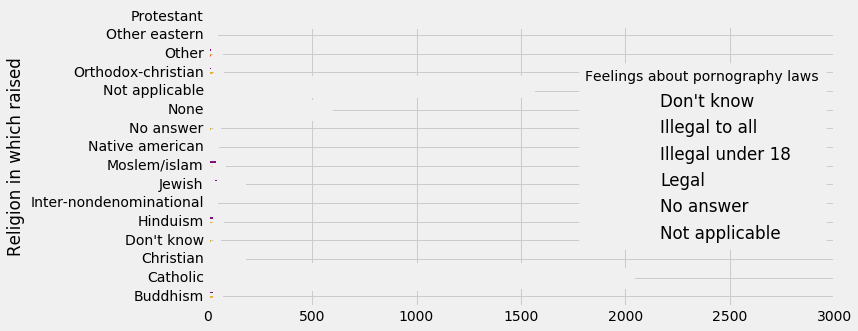

In [59]:
pd.crosstab(df2['Religion in which raised'],df2['Feelings about pornography laws']).plot(kind='barh', figsize=(10, 5), linewidth=20)


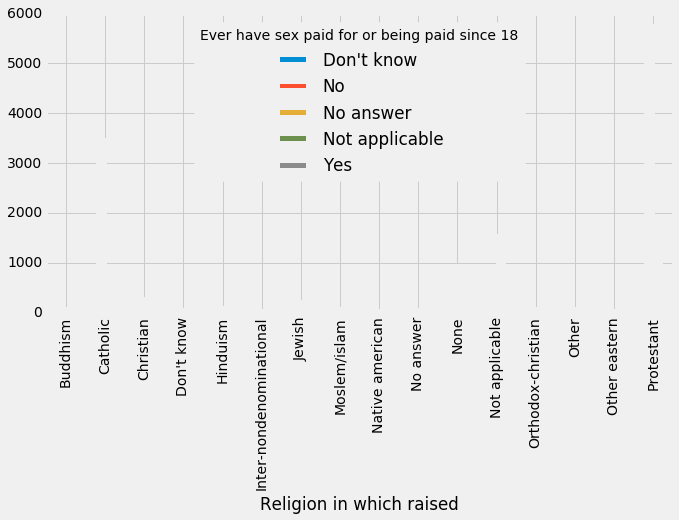

In [60]:
pd.crosstab(df2['Religion in which raised'],df2['Ever have sex paid for or being paid since 18']).plot(kind='bar', figsize=(10, 5), linewidth=7)

In [ ]:
df2.shape

In [ ]:
#Doing Regression

In [61]:
df3 = pd.read_csv('GSS7_8.csv', header=0, delimiter = ';')
len(df3)

15956

In [62]:
df3 = df3.replace({'Not applicable' : None,
                  'Not seected' : None})

In [63]:
df3 = df3.replace({'No':2, 'Yes':1,'No answer':9, "Don't know":8, 'Not applicable':0, 'Legal':3, 'Illegal under 18':6, 'Illegal to all':5, 'Had sex for pay':7, 'Not selected':4, 'Protestant':22, 'Catholic':21, 'Jewish':20, 'Other':5, 'Christian':11, 'Moslem/islam':14, 'Orthodox-christian':10, 'Buddhism':7, 'Hinduism':16, 'Inter-nondenominational':13, 'Native american':12, 'Other eastern':15, 'None':19})

In [64]:
df3 = df3.replace({np.nan:0.0})

In [65]:
df3.dtypes

Religion in which raised                         float64
Feelings about pornography laws                  float64
Seen x-rated movie in last year                  float64
R had sex for pay last year                      float64
Ever have sex paid for or being paid since 18    float64
dtype: object

In [66]:
df3['Religion in which raised'].value_counts()

22.0    7580
21.0    4690
0.0     1518
19.0    1183
11.0     283
20.0     252
14.0      89
16.0      76
7.0       66
5.0       63
10.0      60
9.0       45
8.0       33
12.0       9
13.0       5
15.0       4
Name: Religion in which raised, dtype: int64

In [67]:
df3['Feelings about pornography laws'].value_counts()

0.0    6244
6.0    5958
5.0    3300
3.0     370
8.0      66
9.0      18
Name: Feelings about pornography laws, dtype: int64

In [68]:
df3['Seen x-rated movie in last year'].value_counts()

2.0    7272
0.0    6244
1.0    2395
8.0      25
9.0      20
Name: Seen x-rated movie in last year, dtype: int64

In [69]:
df3['R had sex for pay last year'].value_counts()

0.0    13823
4.0     1879
9.0      178
7.0       76
Name: R had sex for pay last year, dtype: int64

In [70]:
df3['Ever have sex paid for or being paid since 18'].value_counts()

2.0    10830
0.0     4060
1.0      859
9.0      189
8.0       18
Name: Ever have sex paid for or being paid since 18, dtype: int64

In [ ]:
# df3[df3['Religion in which raised'] != 'Not applicable']
# df3 = df3[df3['Religion in which raised'] != 'Not applicable']

In [ ]:
# df3[df3['Feelings about pornography laws'] != 'Not applicable']
# df3 = df3[df3['Feelings about pornography laws'] != 'Not applicable']

In [ ]:
# df3[df3['Seen x-rated movie in last year'] != 'Not applicable']
# df3 = df3[df3['Seen x-rated movie in last year'] != 'Not applicable']

In [ ]:
# df3[df3['R had sex for pay last year'] != 'Not applicable']
# df3 = df3[df3['R had sex for pay last year'] != 'Not applicable']

In [ ]:
# df3[df3['Ever have sex paid for or being paid since 18'] != 'Not applicable']
# df3 = df3[df3['Ever have sex paid for or being paid since 18'] != 'Not applicable']

In [ ]:
# df3[df3['Feelings about pornography laws] != "Not selected"]
# df3 = df3[df3['Feelings about pornography laws'] != "Not selected"]

In [ ]:
# df3[df3['R had sex for pay last year'] != 'Not selected']
# df3 = df3[df3['R had sex for pay last year'] != 'Not selected']

In [ ]:
# df3[df3['Ever have sex paid for or being paid since 18'] != 'Not selected']
# df3 = df3[df3['Ever have sex paid for or being paid since 18'] != 'Not selected']

In [71]:
#PCA plot 
model = PCA(n_components=2)
out = model.fit_transform(df3.iloc[:,:])

In [72]:
out

array([[-2.33291961,  1.22709002],
       [-2.82299466,  2.39363303],
       [-2.33291961,  1.22709002],
       ...,
       [-3.09478341, -0.70433972],
       [-1.31783636, -4.02308384],
       [-3.63482139,  2.09427901]])

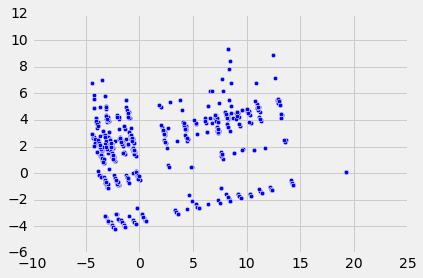

In [73]:
plt.scatter(out[:, 0],out[:, 1] )
plt.show()

In [74]:
#map integer columns to colors
def col2colors(colvals):
    # gray for zero, then a rainbow.
    # This is set up so yes = 1 = red and no = -1 = indigo
    my_colors = ['gray', 'red','orange','yellow','lightgreen','cyan','blue','indigo']
    
    # We may have integers higher than len(my_colors) or less than zero
    # So use the mod operator (%) to make values "wrap around" when they go off the end of the list
    column_ints = colvals.astype(int) % len(my_colors)
    
    # map each index to the corresponding color
    return column_ints.apply(lambda x: my_colors[x])

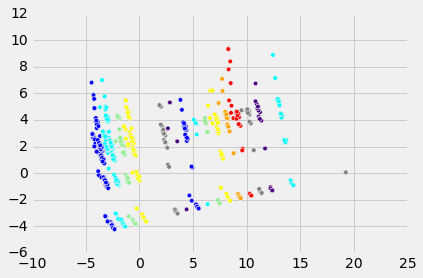

In [75]:
plt.scatter(out[:, 0],out[:, 1], c=col2colors(df3['Religion in which raised']))
plt.show()

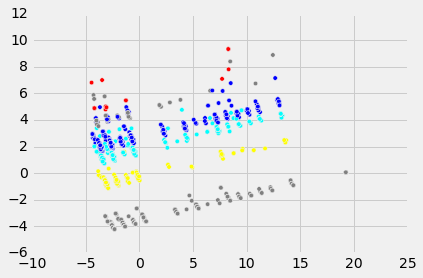

In [76]:
plt.scatter(out[:, 0],out[:, 1], c=col2colors(df3['Feelings about pornography laws']))
plt.show()

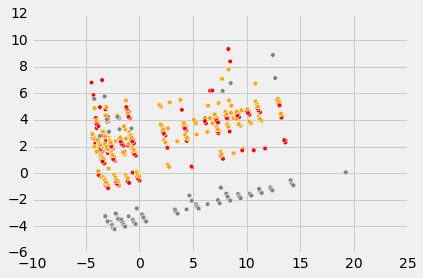

In [77]:
plt.scatter(out[:, 0],out[:, 1], c=col2colors(df3['Seen x-rated movie in last year']))
plt.show()

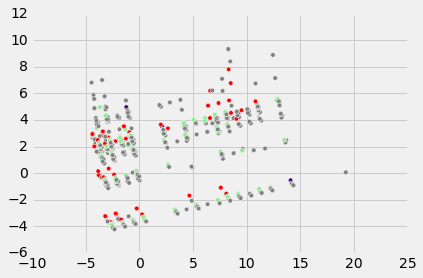

In [78]:
plt.scatter(out[:, 0],out[:, 1], c=col2colors(df3['R had sex for pay last year']))
plt.show()

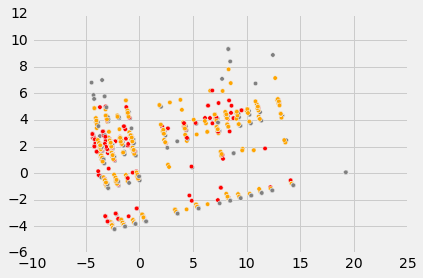

In [79]:
plt.scatter(out[:, 0],out[:, 1], c=col2colors(df3['Ever have sex paid for or being paid since 18']))
plt.show()

In [80]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [81]:
df3

Religion in which raised  Feelings about pornography laws  \
0                          21.0                              5.0   
1                          21.0                              6.0   
2                          21.0                              5.0   
3                          22.0                              0.0   
4                          21.0                              0.0   
5                          22.0                              5.0   
6                          22.0                              6.0   
7                           0.0                              0.0   
8                          21.0                              6.0   
9                          21.0                              0.0   
10                         22.0                              6.0   
11                         21.0                              0.0   
12                          7.0                              6.0   
13                         21.0                              6.0   
14                         20.0                              5.0   
15                          0.0                              0.0   
16                         22.0                              0.0   
17                         22.0                              8.0   
18                         21.0                              6.0   
19                          0.0                              0.0   
20                         22.0                              5.0   
21                         21.0                              9.0   
22                          0.0                              0.0   
23                          0.0                              0.0   
24                          0.0                              0.0   
25                          0.0                              0.0   
26                         22.0                              6.0   
27                          0.0                              0.0   
28                         22.0                              0.0   
29                          0.0                              0.0   
30                         21.0                              6.0   
31                          0.0                              0.0   
32                          0.0                              0.0   
33                         21.0                              0.0   
34                         20.0                              5.0   
35                          0.0                              0.0   
36                          0.0                              0.0   
37                         21.0                              8.0   
38                          0.0                              0.0   
39                         21.0                              6.0   
40                         22.0                              6.0   
41                          0.0                              0.0   
42                         21.0                              5.0   
43                         21.0                              5.0   
44                          0.0                              0.0   
45                          0.0                              0.0   
46                         22.0                              6.0   
47                          0.0                              0.0   
48                          0.0                              0.0   
49                          0.0                              0.0   
50                         19.0                              6.0   
51                         21.0                              6.0   
52                         21.0                              6.0   
53                         21.0                              6.0   
54                         21.0                              6.0   
55                         20.0                              0.0   
56                          9.0                              6.0   
57                         20.0                              0.

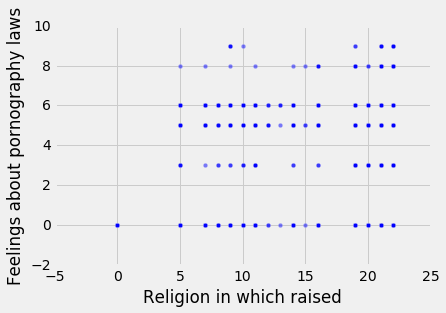

In [82]:
x = df3[['Religion in which raised']].values
y = df3[['Feelings about pornography laws']].values
df3.plot(kind='scatter',x='Religion in which raised',y='Feelings about pornography laws', alpha=0.5)

In [83]:
# function to plot single variable logistic regression results
def plot_logistic_regression(x, y, lm):

    # plot original data
    plt.scatter(x=x,y=y)

    # Now plot the prediction of the fitted model
    predict_x = np.linspace(x.min(), x.max(), 10).reshape(-1, 1) # some evenly spaced points to predict
    predict_y = lm.predict_proba(predict_x)[:,1] #  probability of result = true
    plt.plot(predict_x, predict_y, '-', color='m')

/Users/elinamakri/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


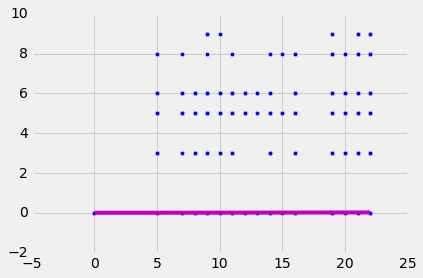

In [84]:
lm = LogisticRegression()
lm.fit(x,y)
plot_logistic_regression(x, y, lm)

In [85]:
results = pd.DataFrame(np.exp(lm.coef_))
results

0
0  0.871622
1  1.051537
2  1.123661
3  1.103022
4  0.991629
5  0.930261

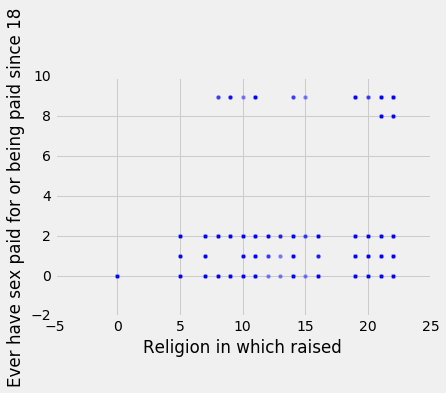

In [86]:
x = df3[['Religion in which raised']].values
y = df3[['Ever have sex paid for or being paid since 18']].values
df3.plot(kind='scatter',x='Religion in which raised',y='Ever have sex paid for or being paid since 18', alpha=0.5)

In [87]:
def plot_logistic_regression(x, y, lm):

    # plot original data
    plt.scatter(x=x,y=y)

    # Now plot the prediction of the fitted model
    predict_x = np.linspace(x.min(), x.max(), 10).reshape(-1, 1) # some evenly spaced points to predict
    predict_y = lm.predict_proba(predict_x)[:,1] #  probability of result = true
    plt.plot(predict_x, predict_y, '-', color='m')

/Users/elinamakri/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


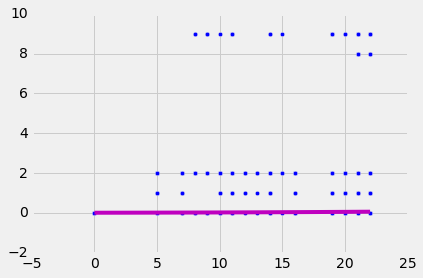

In [88]:
lm = LogisticRegression()
lm.fit(x,y)
plot_logistic_regression(x, y, lm)

In [89]:
df3.corr()

Religion in which raised  \
Religion in which raised                                       1.000000   
Feelings about pornography laws                                0.362958   
Seen x-rated movie in last year                                0.323715   
R had sex for pay last year                                    0.090100   
Ever have sex paid for or being paid since 18                  0.372738   

                                               Feelings about pornography laws  \
Religion in which raised                                              0.362958   
Feelings about pornography laws                                       1.000000   
Seen x-rated movie in last year                                       0.848977   
R had sex for pay last year                                           0.082161   
Ever have sex paid for or being paid since 18                         0.266279   

                                               Seen x-rated movie in last year  \
Religion in which raised                                              0.323715   
Feelings about pornography laws                                       0.848977   
Seen x-rated movie in last year                                       1.000000   
R had sex for pay last year                                           0.002954   
Ever have sex paid for or being paid since 18                         0.232079   

                                               R had sex for pay last year  \
Religion in which raised                                          0.090100   
Feelings about pornography laws                                   0.082161   
Seen x-rated movie in last year                                   0.002954   
R had sex for pay last year                                       1.000000   
Ever have sex paid for or being paid since 18                     0.299530   

                                               Ever have sex paid for or being paid since 18  
Religion in which raised                                                            0.372738  
Feelings about pornography laws                                                     0.266279  
Seen x-rated movie in last year                                                     0.232079  
R had sex for pay last year                                                         0.299530  
Ever have sex paid for or being paid since 18                                       1.000000